In [32]:
# Data Exploration

# Importing various libraries

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Reading in a subset of the data. Total training set has 55 million rows. We don't want all of it

df_train = pd.read_csv("train.csv", nrows=1000000)

In [3]:
# Peeking at the data

df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# Cleaning data
# 1. Missing Values
# 2. Outliers

print("Fare amount has Nan: {}".format(df_train['fare_amount'].isnull().values.any()))
print("Pickup datetime amount has Nan: {}".format(df_train['pickup_datetime'].isnull().values.any()))
print("Pickup lat amount has Nan: {}".format(df_train['pickup_latitude'].isnull().values.any()))
print("Pickup long amount has Nan: {}".format(df_train['pickup_longitude'].isnull().values.any()))
print("Dropoff lat amount has Nan: {}".format(df_train['dropoff_latitude'].isnull().values.any()))
print("Dropoff long amount has Nan: {}".format(df_train['dropoff_longitude'].isnull().values.any()))
print("Passenger count amount has Nan: {}".format(df_train['passenger_count'].isnull().values.any()))

Fare amount has Nan: False
Pickup datetime amount has Nan: False
Pickup lat amount has Nan: False
Pickup long amount has Nan: False
Dropoff lat amount has Nan: True
Dropoff long amount has Nan: True
Passenger count amount has Nan: False


Looks like there are null values in drop off long and lat
Lets have a look at them

In [5]:
# Exploring null latititudes

df_train[df_train['dropoff_latitude'].isnull()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.50,2012-12-11 12:57:00 UTC,-73.992760,40.743098,NaN,NaN,0
245696,2013-03-21 18:07:07.0000001,86.50,2013-03-21 18:07:07 UTC,-73.991572,40.740591,NaN,NaN,0
340533,2012-12-11 12:50:52.00000010,27.50,2012-12-11 12:50:52 UTC,-73.979639,40.784742,NaN,NaN,0
428108,2011-09-08 09:12:52.0000001,11.80,2011-09-08 09:12:52 UTC,-73.987041,40.751542,NaN,NaN,0
471472,2012-12-11 12:34:20.0000006,7.80,2012-12-11 12:34:20 UTC,0.000000,0.000000,NaN,NaN,0
524834,2011-09-25 23:01:12.0000005,14.76,2011-09-25 23:01:12 UTC,-73.985374,40.768518,NaN,NaN,0
574023,2013-11-04 20:59:15.0000001,10.20,2013-11-04 20:59:15 UTC,-73.998460,40.745406,NaN,NaN,0
580338,2012-12-11 12:00:53.0000002,21.00,2012-12-11 12:00:53 UTC,-73.974743,40.752057,NaN,NaN,0
794694,2013-11-04 20:07:59.0000006,7.20,2013-11-04 20:07:59 UTC,-73.977048,40.787565,NaN,NaN,0
895400,2011-06-20 11:34:44.0000001,40.00,2011-06-20 11:34:44 UTC,-73.862900,40.768900,NaN,NaN,0


The NaN for drop off long/lat seem to be in pairs with 0 passengers
This is obviously an errornous entry (unless its a loop hole exploited the taxi driver? hmmm)
Anyway, lets remove these entries

In [6]:
# Removing null entries

df_train = df_train[df_train['dropoff_latitude'].isnull() == False]
print("Fare amount has Nan: {}".format(df_train['fare_amount'].isnull().values.any()))
print("Pickup datetime amount has Nan: {}".format(df_train['pickup_datetime'].isnull().values.any()))
print("Pickup lat amount has Nan: {}".format(df_train['pickup_latitude'].isnull().values.any()))
print("Pickup long amount has Nan: {}".format(df_train['pickup_longitude'].isnull().values.any()))
print("Dropoff lat amount has Nan: {}".format(df_train['dropoff_latitude'].isnull().values.any()))
print("Dropoff long amount has Nan: {}".format(df_train['dropoff_longitude'].isnull().values.any()))
print("Passenger count amount has Nan: {}".format(df_train['passenger_count'].isnull().values.any()))

Fare amount has Nan: False
Pickup datetime amount has Nan: False
Pickup lat amount has Nan: False
Pickup long amount has Nan: False
Dropoff lat amount has Nan: False
Dropoff long amount has Nan: False
Passenger count amount has Nan: False


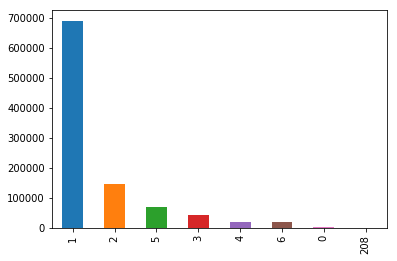

In [7]:
# Exploring Passenger Count feature

df_train['passenger_count'].value_counts().plot.bar()

We see clearly that single passengers dominate the taxi rides, and it slowly tapers off
We see two obvious outliers here, 0 and 208 passengers. I don't see how those make sense
Lets remove them

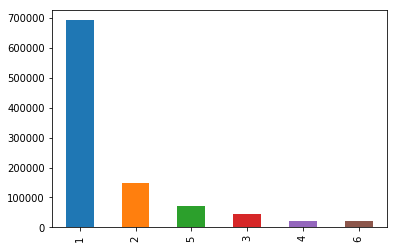

In [8]:
# Removing odd passenger counts

df_train = df_train[df_train.passenger_count != 208]
df_train = df_train[df_train.passenger_count != 0]
df_train['passenger_count'].value_counts().plot.bar()

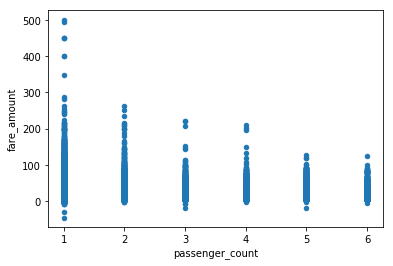

In [9]:
# Scatter plot between passenger count and fare

df_train.plot(kind='scatter', x='passenger_count', y='fare_amount')

It seems like theres a negative relationship between the number of passangers and the total fare
Perhaps one can infer that big groups dont travel longer distances, as compared to smaller groups

I do see some negative fare amounts. Lets remove those as well

In [10]:
# Removing negative fares

df_train = df_train[df_train.fare_amount > 0]

Next, we'll look at price and date
I would like to explore the price difference between weekdays and weekends, as well as time of travel
Since the data has given me the date as it is, we need to do some feature engineering by creating more features
The new features would be the day of the week, and time

In [11]:
# Creating new features date and time

df_clean = df_train

df_clean['date'] = df_train['pickup_datetime'].apply(lambda x : x[:-12])
df_clean['time'] = df_train['pickup_datetime'].apply(lambda x : x[11:-4])

# removing datetime, since no longer needed
df_clean = df_clean.drop(columns=['pickup_datetime'])

df_clean['day'] = df_clean['date'].apply(lambda x : datetime.datetime.strptime(x.strip(), "%Y-%m-%d").weekday())

df_clean.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16,1
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,3
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42,5
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00,1


Given this new day feature, we can analyze 
1. How many taxi rides are on a given day
2. How fare amount varies across different days

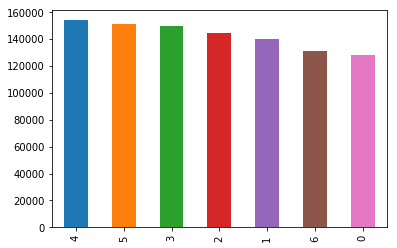

In [12]:
# Exploring day feature

df_clean[['fare_amount', 'day']].head()

df_clean['day'].value_counts().plot.bar()

In descending order, Friday, Saturday, Thursday, Wednesday, Tuesday, Sunday, Monday
How about correlation between day and fare amount?

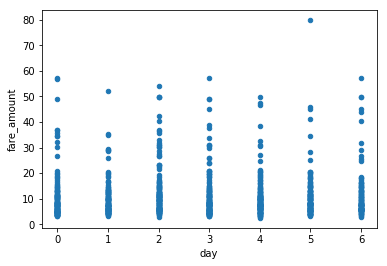

In [13]:
# Scatter plot of day and far amount
df_clean.sample(1000).plot.scatter(x='day', y='fare_amount')

Not much correlation. Lets explore the time feature now!
For time, we'll split it by hour

In [14]:
# Exploring Time feature


df_clean['hour'] = df_clean['time'].apply(lambda x : int(x.split(":")[0]))

df_clean.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21,0,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16,1,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42,5,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00,1,7


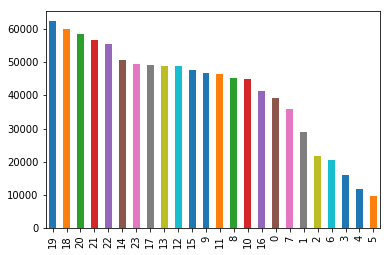

In [15]:
# Lets analyze the time groups

df_clean['hour'].value_counts().plot.bar()

We can see a nice trend, with 7pm having the most amount of rides, and 5am having the least.

Lets look at how these times correlate with the days

Monday


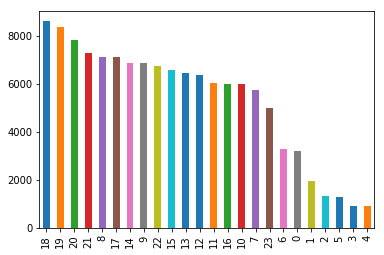

Tuesday


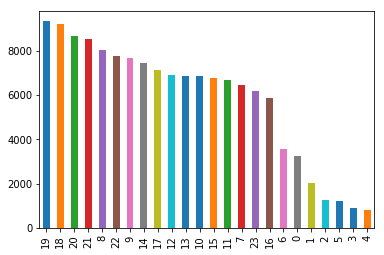

Wednesday


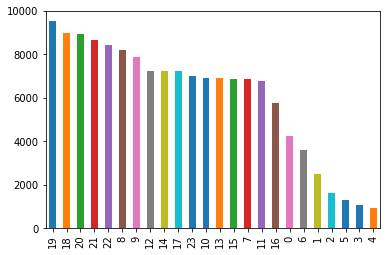

Thursday


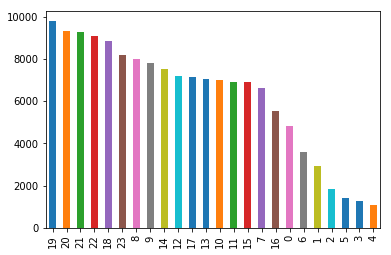

Friday


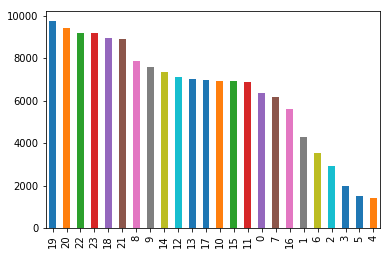

Saturday


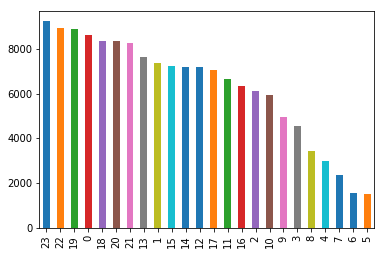

Sunday


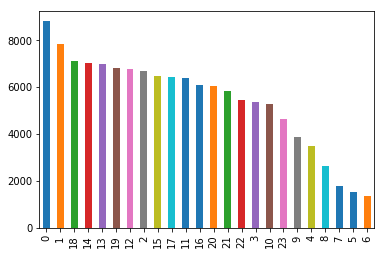

In [41]:
days = {0 : "Monday",
        1 : "Tuesday",
        2 : "Wednesday",
        3 : "Thursday",
        4 : "Friday",
        5 : "Saturday",
        6 : "Sunday",
       }

for x in range(7):
    df_clean[df_clean['day'] == x]['hour'].value_counts().plot.bar()
    print(days[x])
    plt.show()

Monday - Friday, 7pm - 8pm has the most rides, while on saturday, it's 10pm - 11pm. Interestingly on Sunday, its 12am -1am. I thought folks would want to go home earlier as they have work the next day!

Now comes the interesting part about analyzing geolocation data

In [42]:
df_clean.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21,0,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16,1,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42,5,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00,1,7


Lets scatter plot pickup/dropoff long/lat to see if there are any outliers to remove

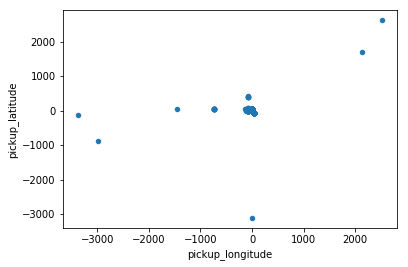

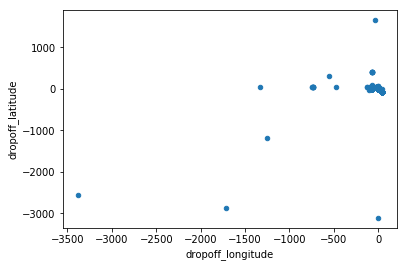

In [49]:
df_clean.plot.scatter(x='pickup_longitude', y='pickup_latitude')
plt.show()
df_clean.plot.scatter(x='dropoff_longitude', y='dropoff_latitude')
plt.show()

We can see some wildy inaccurate coordinates that are way out of NYC. Lets remove those, and replot the scatter

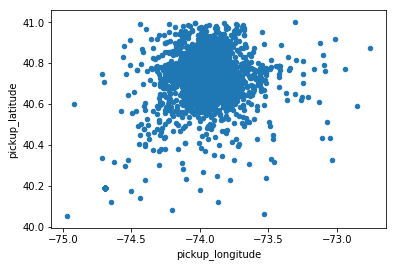

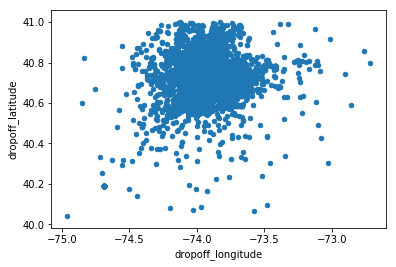

In [58]:
# These cut off values were done by trial and error, and observing the bounding box of NYC on Google Maps

df_clean = df_clean[df_clean['pickup_longitude'] > -75]
df_clean = df_clean[df_clean['pickup_longitude'] < -72]
df_clean = df_clean[df_clean['pickup_latitude'] < 41]
df_clean = df_clean[df_clean['pickup_latitude'] > 40]


df_clean = df_clean[df_clean['dropoff_longitude'] > -75]
df_clean = df_clean[df_clean['dropoff_longitude'] < -72]
df_clean = df_clean[df_clean['dropoff_latitude'] < 41]
df_clean = df_clean[df_clean['dropoff_latitude'] > 40]

df_clean.plot.scatter(x='pickup_longitude', y='pickup_latitude')
plt.show()
df_clean.plot.scatter(x='dropoff_longitude', y='dropoff_latitude')
plt.show()


Now the plot looks more consistent. We need to account for the tolls.

There are a total of 11 tolls bridges in NYC: https://en.wikipedia.org/wiki/Category:Toll_bridges_in_New_York_City

Some of them are one way, while others are two ways

Tolls are discounted if they use E-ZPass. We assume that taxi companies are well equipped, and all use E-Zpass

1. Bayonne Bridge
   - Staten - Bayonne = \$15.00
   - Bayonne - Staten = \$0.00
2. Bronx-Whitestone Bridge
   - Both ways = \$5.76
3. Cross Bay Veterans Memorial Bridge
   - Both ways = \$2.16
4. George Washington Bridge
   - Both ways = \$10.50
5. Geothals Bridge
   - New Jersey - New York = \$10.50
   - New York - New Jersey = \$0.00
6. Henry Hudson Bridge
   - Both ways = \$2.64
7. Marine Parkway-Gil Hodges Memorial Bridge
   - Both ways = \$2.16
8. Outerbridge Crossing
   - Both ways = \$12.50
9. Throgs Neck Bridge
   - Both ways = \$5.76
10. Triborough Bridge
   - Both ways = \$5.76
11. Verrazzano-Narrows Bridge
   - Brooklyn - Staten = \$11.52
   - Staten - Brooklyn = \$0.00
   
The hard part is figuring out with pickup - dropoff points will cross these bridges, and which direction are they coming from!